In [38]:
import numpy as np
import cv2 
from scipy.signal import convolve2d
# from skimage.color import rgb2gray
from scipy import signal
import skimage.transform as sktr
import matplotlib.pyplot as plt
import skimage.color as color

In [46]:
def gaussian_filter(img, sigma):
    w = 100
    h = 100
    x, y = np.mgrid[round(-w/2):round(w/2), round(-h/2):round(h/2)]
    f = np.exp(-x**2/(2*sigma**2)-y**2/(2*sigma**2))
    gaussian = f/f.sum()
#     print(img.shape)
#     print(gaussian.shape)
    
    gaus = signal.fftconvolve(img, gaussian, mode='same')
    return gaus


def gStack(iimg, N):
    w = iimg.shape[0]
    h = iimg.shape[1]

    stack = np.zeros((w,h,N))
    for x in range(0,N):
        sigma = 2**x
        img = gaussian_filter(iimg,sigma)
        stack[:,:,x] = img
    return stack

def lStack(gstack):
    w,h,n = gstack.shape
    stack = np.zeros((w,h,n))
    for x in range(0,n-1):
        img = gstack[:,:,x]-gstack[:,:,x+1]
        stack[:,:,x] = img
        if x == n-2:
            stack[:,:,x+1] = gstack[:,:,x+1]
    return stack

def alphagStack(iimg, N, alpha):
    w, h= iimg.shape
    stack = np.zeros((w,h,N))
    for x in range(0,N):
        sigma = (2**(x*alpha))
        img = gaussian_filter(iimg,sigma)
        stack[:,:,x] = img
    return stack

In [47]:
def blend(left_lstack,right_lstack,left_gstack,right_gstack,mask_gstack,N): 
    w, h, N = mask_gstack.shape
    blend = np.zeros((w,h))
    aleft = np.zeros((w,h))
    aright = np.zeros((w,h))
    for x in range(0,N):
        left = mask_gstack[:,:,x]*left_lstack[:,:,x]
        right = (1 - mask_gstack[:,:,x])*right_lstack[:,:,x]
        blend += left + right
        aleft += left
        aright += right
        plt.figure()
        plt.imshow(left)
        string = "left"+str(x)+".jpg"
#         scipy.misc.toimage(left).save(string)
        plt.figure()
        plt.imshow(right)
        string = "right"+str(x)+".jpg"
#         scipy.misc.toimage(right).save(string)
        plt.figure()
        plt.imshow(left+right)
        string = "mix"+str(x)+".jpg"
#         scipy.misc.toimage(left+right).save(string)
        plt.show()
    return blend,aleft,aright

(300, 300, 3)
(300, 300)


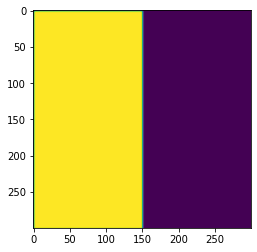

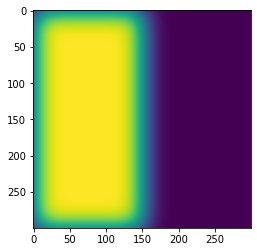

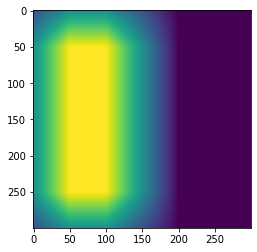

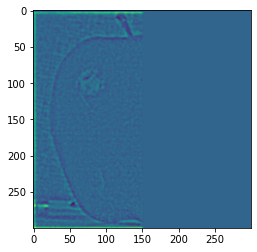

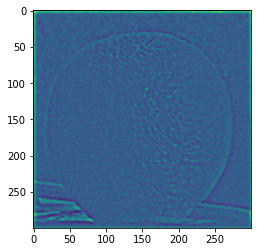

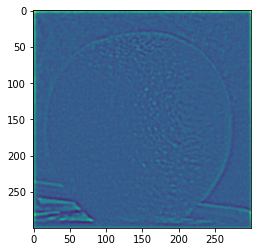

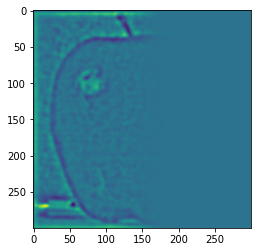

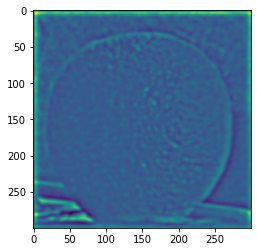

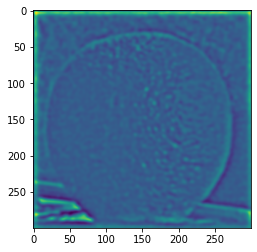

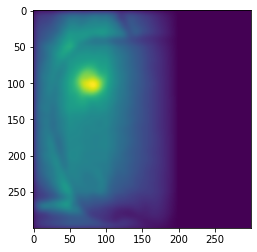

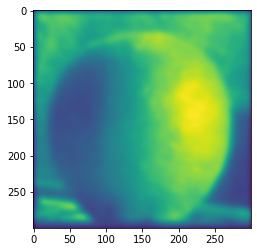

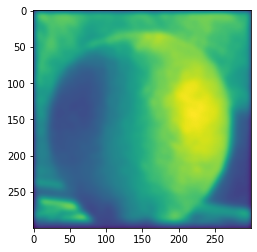

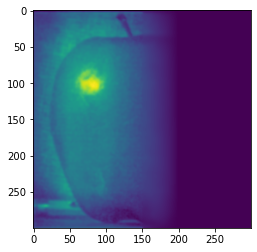

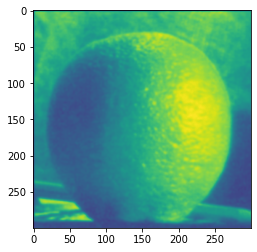

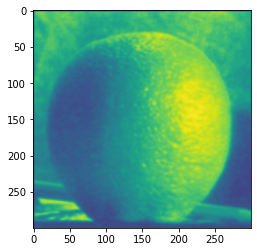

<Figure size 432x288 with 0 Axes>

In [48]:
# Set N for number of layers and alpha
N = 3
alpha = 4

# Read in images and mask, creat Gaussian and Laplacian Stacks
left = plt.imread('apple.jpeg')/255.
# left = sktr.rescale(left, 0.4)
print(left.shape)
left = color.rgb2gray(left)
print(left.shape)
left_gstack = gStack(left, N)
left_lstack = lStack(left_gstack)

# him = plt.imread('../img/lincoln.jpg')/255.
# himg = color.rgb2gray(him)
# gstack = gStack(himg, N)
# lstack = lStack(gstack)

right = plt.imread('orange.jpeg')/255.
# right = sktr.rescale(right, 0.4)
right = color.rgb2gray(right)
right_gstack = gStack(right, N)
right_lstack = lStack(right_gstack)

mask = plt.imread('mask.png')/255.
mask = sktr.resize(mask, left.shape)
maskg = color.rgb2gray(mask)
mask_gstack = alphagStack(maskg, N, alpha)

for x in range(0,N):
    plt.figure()
    plt.imshow(mask_gstack[:,:,x])
    plt.show()
    
# Blend images
bimg,aleft,aright = blend(left_lstack,right_lstack,left_gstack,right_gstack,mask_gstack,N)
plt.imshow(aleft)
string = "aleft"+".jpg"
# scipy.misc.toimage(aleft).save(string)
plt.figure()
plt.imshow(aright)
string = "aright"+".jpg"
# scipy.misc.toimage(aright).save(string)
plt.figure()
plt.imshow(bimg)
plt.figure()
plt.show()


# scipy.misc.toimage(bimg).save('outfile.jpg')